#Importing the lib and csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
try:
    df = pd.read_csv('suv_predictions_dataset.csv')
    print("Dataset loaded successfully!")
    print(df.head()) # Display the first few rows to confirm
except FileNotFoundError:
    print("Error: 'suv_predictions_dataset.csv' not found. Please ensure the file is in the correct directory.")

Dataset loaded successfully!
    User ID  Gender  Age  Estimated Salary  Purchased
0  15302236    Male   48             47819          1
1  15828246    Male   51             59443          1
2  15011524  Female   45             54332          1
3  15107327    Male   25             34168          0
4  15451497    Male   59             56267          0


#analizing the data set

In [2]:
# --- Program 1: Basic Data Inspection and Summary Statistics ---

print("--- Basic Data Inspection ---")
print("\nDataset Shape (Rows, Columns):", df.shape)

print("\n--- Data Information (Non-null counts and Data Types) ---")
df.info()

print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- Count of Unique Values for Object/Categorical Columns ---")
for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{column}':")
    print(df[column].value_counts())

--- Basic Data Inspection ---

Dataset Shape (Rows, Columns): (500, 5)

--- Data Information (Non-null counts and Data Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           500 non-null    int64 
 1   Gender            500 non-null    object
 2   Age               500 non-null    int64 
 3   Estimated Salary  500 non-null    int64 
 4   Purchased         500 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.7+ KB

--- Descriptive Statistics for Numerical Columns ---
            User ID         Age  Estimated Salary   Purchased
count  5.000000e+02  500.000000        500.000000  500.000000
mean   1.549917e+07   39.798000      50093.788000    0.550000
std    2.868871e+05   12.524493      14418.079331    0.497992
min    1.500229e+07   18.000000      17997.000000    0.000000
25%    1.524486e+07   29.0000

In [3]:
# --- Program 2: Checking for Missing Values ---

print("--- Missing Values Check ---")
print(df.isnull().sum())

print("\n--- Percentage of Missing Values ---")
print((df.isnull().sum() / len(df)) * 100)

--- Missing Values Check ---
User ID             0
Gender              0
Age                 0
Estimated Salary    0
Purchased           0
dtype: int64

--- Percentage of Missing Values ---
User ID             0.0
Gender              0.0
Age                 0.0
Estimated Salary    0.0
Purchased           0.0
dtype: float64


--- Correlation Matrix (for Numerical Columns) ---
                   User ID       Age  Estimated Salary  Purchased
User ID           1.000000  0.032592         -0.006202   0.023600
Age               0.032592  1.000000          0.845705   0.185248
Estimated Salary -0.006202  0.845705          1.000000   0.196190
Purchased         0.023600  0.185248          0.196190   1.000000


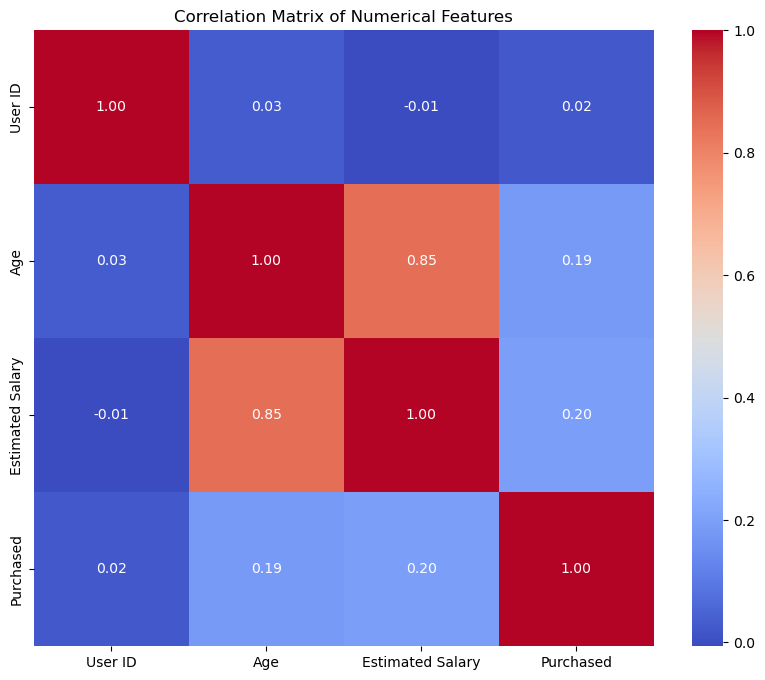

In [4]:
# --- Program 3: Correlation Analysis ---

print("--- Correlation Matrix (for Numerical Columns) ---")
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

--- Visualizing Distributions of Numerical Features ---


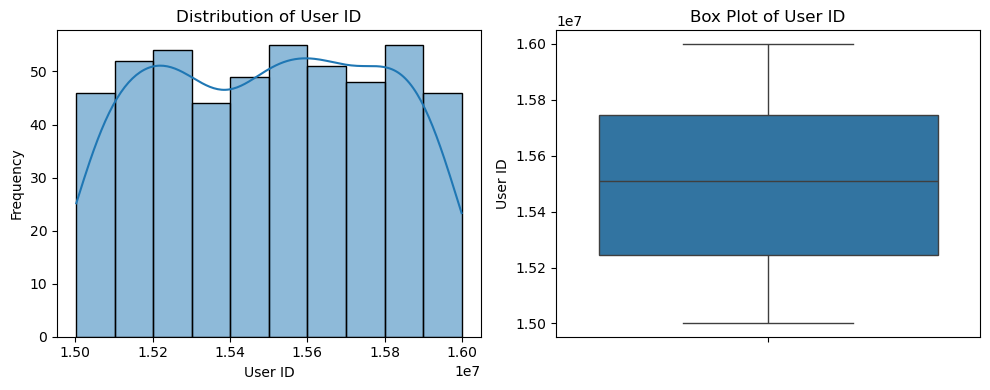

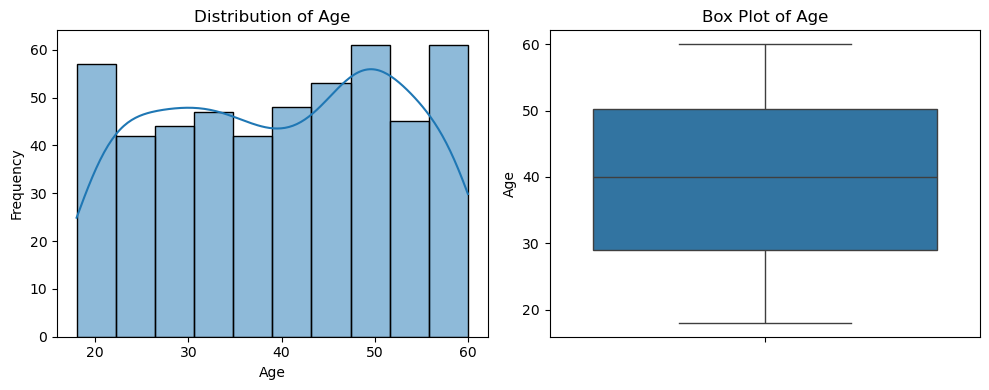

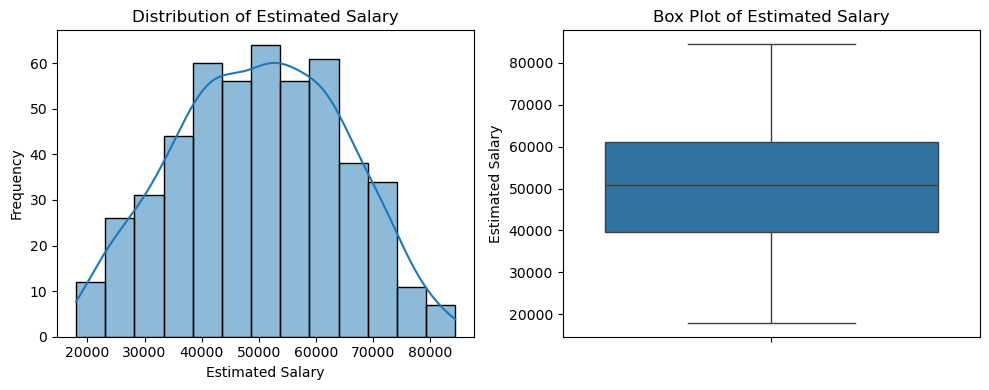

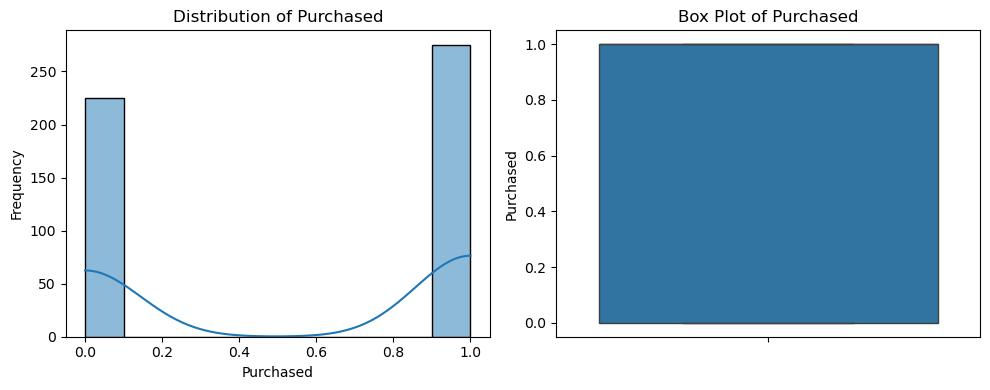

In [5]:
# --- Program 4: Visualizing Distributions ---

print("--- Visualizing Distributions of Numerical Features ---")
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

#Data Wrangling 

In [6]:
# --- Program 1, Option A: Dropping Rows with Missing Values ---
print("--- Handling Missing Values: Dropping Rows ---")
initial_rows = df.shape[0]
df.dropna(inplace=True)
rows_after_dropping = df.shape[0]
print(f"Original rows: {initial_rows}, Rows after dropping NaNs: {rows_after_dropping}")
print(f"Number of rows dropped: {initial_rows - rows_after_dropping}")

# Verify
print("\nMissing values after dropping rows:")
print(df.isnull().sum())

--- Handling Missing Values: Dropping Rows ---
Original rows: 500, Rows after dropping NaNs: 500
Number of rows dropped: 0

Missing values after dropping rows:
User ID             0
Gender              0
Age                 0
Estimated Salary    0
Purchased           0
dtype: int64


In [7]:
# --- Program 1, Option B: Imputing Missing Numerical Values ---
print("\n--- Handling Missing Values: Imputing Numerical Columns ---")
numerical_cols_with_missing = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()

for col in numerical_cols_with_missing:
    # You can choose mean, median, or even mode for imputation
    # For linear regression, mean or median are common for numerical data
    # mean_value = df[col].mean()
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Missing values in '{col}' imputed with median: {median_value}")

# Verify
print("\nMissing values after numerical imputation:")
print(df.isnull().sum())


--- Handling Missing Values: Imputing Numerical Columns ---

Missing values after numerical imputation:
User ID             0
Gender              0
Age                 0
Estimated Salary    0
Purchased           0
dtype: int64


In [8]:
# --- Program 1, Option C: Imputing Missing Categorical Values ---
print("\n--- Handling Missing Values: Imputing Categorical Columns ---")
categorical_cols_with_missing = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()].tolist()

for col in categorical_cols_with_missing:
    # Impute with the most frequent value (mode)
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Missing values in '{col}' imputed with mode: {mode_value}")
    # Alternatively, you could fill with a new category like 'Missing'
    # df[col].fillna('Missing', inplace=True)

# Verify
print("\nMissing values after categorical imputation:")
print(df.isnull().sum())


--- Handling Missing Values: Imputing Categorical Columns ---

Missing values after categorical imputation:
User ID             0
Gender              0
Age                 0
Estimated Salary    0
Purchased           0
dtype: int64


In [9]:
# --- Program 2: Handling Categorical Features (One-Hot Encoding) ---

print("\n--- Handling Categorical Features: One-Hot Encoding ---")

# Identify categorical columns that are *not* your target variable (if your target is numerical)
# You will need to explicitly list your categorical feature columns here
# For example: categorical_features = ['Manufacturer', 'Color', 'FuelType']
# Assuming your target is numerical, if it's categorical you'd handle it differently for classification.

# Placeholder: Replace with your actual categorical feature column names
# Let's assume for now, any 'object' type columns (excluding the target if it's not object) are categorical features
categorical_features_to_encode = df.select_dtypes(include='object').columns.tolist()

# If you have a specific target column that is numerical, ensure it's not included here
# Example: if 'Price' is your numerical target and it's currently an object type due to some issue,
# you would exclude it from this list and convert it to numeric separately.
# For simplicity, assuming all 'object' columns are features to be encoded.

if categorical_features_to_encode:
    print(f"Categorical features identified for encoding: {categorical_features_to_encode}")
    df = pd.get_dummies(df, columns=categorical_features_to_encode, drop_first=True, dtype=int)
    print("\nDataFrame after One-Hot Encoding:")
    print(df.head())
    print(f"New shape after encoding: {df.shape}")
else:
    print("No 'object' type columns found for One-Hot Encoding. If you have categorical features, ensure they are of 'object' or 'category' dtype.")
    


--- Handling Categorical Features: One-Hot Encoding ---
Categorical features identified for encoding: ['Gender']

DataFrame after One-Hot Encoding:
    User ID  Age  Estimated Salary  Purchased  Gender_Male
0  15302236   48             47819          1            1
1  15828246   51             59443          1            1
2  15011524   45             54332          1            0
3  15107327   25             34168          0            1
4  15451497   59             56267          0            1
New shape after encoding: (500, 5)


In [ ]:
# Assuming 'Your_Target_Column' is the name of the column you want to predict
# And 'Feature_Column_1', 'Feature_Column_2', etc., are the columns you'll use to make predictions

# --- Define Independent Variables (Features) and Dependent Variable (Target) ---

# Make sure you have run the data wrangling steps first, especially one-hot encoding,
# so your DataFrame 'df' contains only numerical columns suitable for the model.

# Example: If your target is 'Price' and features are 'EngineSize', 'Horsepower', 'Age'
# Replace 'Your_Target_Column' and the list of feature columns with your actual column names.

# Independent Variables (Features - X)
# Drop the target column from the DataFrame to get the features
X = df.drop('Your_Target_Column', axis=1) # Replace 'Your_Target_Column'

# Alternatively, explicitly select your feature columns:
# X = df[['Feature_Column_1', 'Feature_Column_2', 'Feature_Column_3']] # Replace with your feature names

# Dependent Variable (Target - y)
y = df['Your_Target_Column'] # Replace 'Your_Target_Column'

print("\nIndependent Variables (X) Head:")
print(X.head())

print("\nDependent Variable (y) Head:")
print(y.head())

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

Method 1: Print statement output
Data summary: Mean = -0.04, Std = 1.02


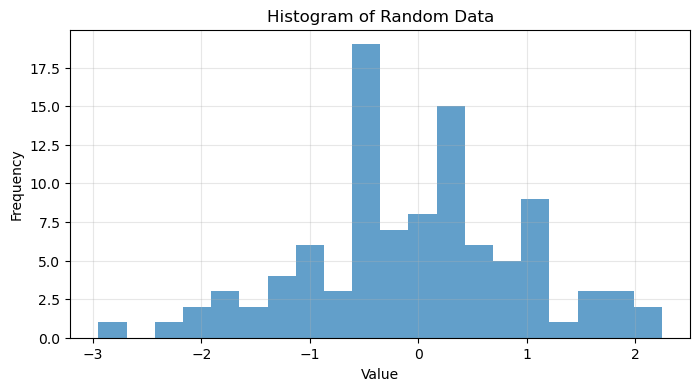

,values
0,-0.120083
1,-1.639443
2,-0.019653
3,0.560250
4,1.797603


In [11]:
# Example of code that produces visible output in Jupyter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
data = np.random.randn(100)
df = pd.DataFrame({'values': data})

# Method 1: Using print statements
print("Method 1: Print statement output")
print(f"Data summary: Mean = {data.mean():.2f}, Std = {data.std():.2f}")

# Method 2: Last line evaluation (Jupyter automatically displays the last line)
df.describe()

# Method 3: Displaying visualizations
plt.figure(figsize=(8, 4))
plt.hist(data, bins=20, alpha=0.7)
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()  # This is important for displaying plots in Jupyter

# Method 4: Display DataFramedisplay(df.head())  # Jupyter-specific function for rich output

In [17]:
import pandas as pd
import numpy as np  # This was the missing import!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics # For evaluation metrics later

# --- Consolidated Code for Full ML Workflow ---

print("--- Starting Full ML Workflow ---")

# 1. Load the dataset
try:
    df = pd.read_csv('suv_predictions_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'suv_predictions_dataset.csv' not found. Please ensure the file is in the correct directory.")
    # In a notebook, you might just let it raise an error, or exit if running as a script.
    # For robust notebooks, you'd ensure the file is correctly placed or give user clear instructions.
    raise FileNotFoundError("suv_predictions_dataset.csv not found.")


# Display available columns
print("\nAvailable columns in DataFrame:")
print(df.columns.tolist())

# Display the first few rows to understand the data
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 2. Data Wrangling and Defining X and y

# Automatically identify a likely target column
actual_target_column = None
# Prioritize 'Purchased' for binary classification.
possible_target_columns_priority = ['Purchased', 'Estimated Salary', 'Age'] # 'Estimated Salary' has a space
for col in possible_target_columns_priority:
    if col in df.columns:
        # Check if the column has a low number of unique values, which might indicate a binary target (like 0/1)
        if df[col].nunique() <= 2 and df[col].dtype == 'int64':
            actual_target_column = col
            break
        # If it's a numeric column with more unique values, it could be a regression target
        elif df[col].dtype in ['int64', 'float64']:
            actual_target_column = col
            break

if actual_target_column:
    print(f"\nAutomatically identified '{actual_target_column}' as the Dependent Variable (y).")
    y = df[actual_target_column]

    # For independent variables (X), use all other suitable columns.
    df_for_X = df.drop(columns=[actual_target_column], errors='ignore').copy()

    # Apply one-hot encoding if there are any remaining categorical columns in df_for_X
    categorical_cols_for_encoding = df_for_X.select_dtypes(include='object').columns.tolist()
    if categorical_cols_for_encoding:
        print(f"Applying one-hot encoding to categorical features: {categorical_cols_for_encoding}")
        # Using dtype=int for dummy variables makes them integers (0 or 1)
        df_for_X = pd.get_dummies(df_for_X, columns=categorical_cols_for_encoding, drop_first=True, dtype=int)

    # Ensure all columns in X are numeric. Drop any non-numeric that could not be encoded.
    X = df_for_X.select_dtypes(include=np.number)

    # Drop 'User ID' if it exists in X, as it's typically just an identifier and not a useful feature
    if 'User ID' in X.columns:
        X = X.drop(columns=['User ID'])
        print("Dropped 'User ID' column from features as it is typically not a useful feature.")


    # Drop any columns that might have all NaN values after transformations (though imputation is done below)
    X = X.dropna(axis=1, how='all')

    # Handle any remaining NaN values in X by imputing with the mean (a simple approach)
    if X.isnull().any().any():
        print("Handling remaining missing values in X by imputing with mean.")
        X = X.fillna(X.mean())

    if not X.empty:
        print("\n--- Independent Variables (X) Head ---")
        print(X.head())
        print(f"Shape of X: {X.shape}")

        print("\n--- Dependent Variable (y) Head ---")
        print(y.head())
        print(f"Shape of y: {y.shape}")

        # 3. Splitting the data into training and testing sets
        print("\n--- Performing Train-Test Split ---")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        print("\n--- Data Split Summary ---")
        print(f"Shape of X_train: {X_train.shape}")
        print(f"Shape of X_test: {X_test.shape}")
        print(f"Shape of y_train: {y_train.shape}")
        print(f"Shape of y_test: {y_test.shape}")

        # 4. Train the Linear Regression Model
        print("\n--- Training Linear Regression Model ---")
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        print("\nLinear Regression model trained successfully!")

        # Inspect the coefficients and intercept
        print("\nModel Coefficients (slope for each feature):")
        # Ensure X.columns is used for coefficient DataFrame as X is the full feature set
        # Filter X.columns to only include those that were actually used in training
        # (This is important if columns were dropped during wrangling not explicitly handled above)
        feature_names_used = X_train.columns
        coefficients_df = pd.DataFrame(regressor.coef_, feature_names_used, columns=['Coefficient'])
        print(coefficients_df)

        print(f"\nModel Intercept: {regressor.intercept_}")

        print("\nModel training complete. Next, we will make predictions and evaluate the model's performance.")

    else:
        print("\nCould not automatically determine suitable Independent Variables (X) after preprocessing.")
        print("Please review the 'Available columns in DataFrame:' above and explicitly specify your desired feature columns.")
else:
    print("\nCould not automatically determine a common target column like 'Purchased', 'Price', 'Estimated Salary' or 'Age'.")
    print("Please inspect the 'Available columns in DataFrame:' above and explicitly tell me which column is your target (dependent variable) and which columns are your features (independent variables).")

--- Starting Full ML Workflow ---
Dataset loaded successfully!

Available columns in DataFrame:
['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']

First 5 rows of the DataFrame:
    User ID  Gender  Age  Estimated Salary  Purchased
0  15302236    Male   48             47819          1
1  15828246    Male   51             59443          1
2  15011524  Female   45             54332          1
3  15107327    Male   25             34168          0
4  15451497    Male   59             56267          0

Automatically identified 'Purchased' as the Dependent Variable (y).
Applying one-hot encoding to categorical features: ['Gender']
Dropped 'User ID' column from features as it is typically not a useful feature.

--- Independent Variables (X) Head ---
   Age  Estimated Salary  Gender_Male
0   48             47819            1
1   51             59443            1
2   45             54332            0
3   25             34168            1
4   59             56267            1
Shape o

In [18]:
import pandas as pd
import numpy as np  # Essential for numerical operations like df.select_dtypes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics # For evaluation metrics later

# --- Consolidated Code for Full ML Workflow with Specific Column Selection ---

print("--- Starting Full ML Workflow ---")

# 1. Load the dataset
try:
    df = pd.read_csv('suv_predictions_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'suv_predictions_dataset.csv' not found. Please ensure the file is in the correct directory.")
    raise # Re-raise the error so you know if the file isn't there.


# 2. Keep only the specified columns
# The user wants to keep: 'User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased'
# Check if all specified columns exist before selecting
required_columns = ['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following required columns are missing from the dataset: {missing_columns}")
    print("Available columns in your dataset are:", df.columns.tolist())
    raise ValueError("Missing required columns for processing.")
else:
    df = df[required_columns].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nDataFrame filtered to keep only: {required_columns}")
    print("First 5 rows of filtered DataFrame:")
    print(df.head())


# 3. Define Dependent Variable (y) and Independent Variables (X)

# Define 'Purchased' as the target variable (y)
target_column = 'Purchased'
y = df[target_column]
print(f"\nDependent Variable (y) set to: '{target_column}'")

# Define Independent Variables (X)
# Drop the target column and 'User ID' (as it's usually just an identifier)
# 'Gender' will be one-hot encoded next.
X_features_df = df.drop(columns=[target_column, 'User ID'], errors='ignore').copy()

# Handle categorical features (like 'Gender') with One-Hot Encoding
categorical_cols_for_encoding = X_features_df.select_dtypes(include='object').columns.tolist()
if categorical_cols_for_encoding:
    print(f"Applying one-hot encoding to categorical features: {categorical_cols_for_encoding}")
    X_features_df = pd.get_dummies(X_features_df, columns=categorical_cols_for_encoding, drop_first=True, dtype=int)

# Ensure all columns in X are numeric
X = X_features_df.select_dtypes(include=np.number)

# Handle any remaining NaN values in X by imputing with the mean (simple approach)
if X.isnull().any().any():
    print("Handling remaining missing values in X by imputing with mean.")
    X = X.fillna(X.mean())

if not X.empty:
    print("\n--- Independent Variables (X) Head ---")
    print(X.head())
    print(f"Shape of X: {X.shape}")

    print("\n--- Dependent Variable (y) Head ---")
    print(y.head())
    print(f"Shape of y: {y.shape}")

    # 4. Splitting the data into training and testing sets
    print("\n--- Performing Train-Test Split ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n--- Data Split Summary ---")
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")

    # 5. Train the Linear Regression Model
    print("\n--- Training Linear Regression Model ---")
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    print("\nLinear Regression model trained successfully!")

    # Inspect the coefficients and intercept
    print("\nModel Coefficients (slope for each feature):")
    feature_names_used = X_train.columns
    coefficients_df = pd.DataFrame(regressor.coef_, feature_names_used, columns=['Coefficient'])
    print(coefficients_df)

    print(f"\nModel Intercept: {regressor.intercept_}")

    print("\nModel training complete. Next, we will make predictions and evaluate the model's performance.")

else:
    print("\nError: Independent Variables (X) DataFrame is empty after preprocessing.")
    print("Please check your column selections and data integrity.")

--- Starting Full ML Workflow ---
Dataset loaded successfully!

DataFrame filtered to keep only: ['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']
First 5 rows of filtered DataFrame:
    User ID  Gender  Age  Estimated Salary  Purchased
0  15302236    Male   48             47819          1
1  15828246    Male   51             59443          1
2  15011524  Female   45             54332          1
3  15107327    Male   25             34168          0
4  15451497    Male   59             56267          0

Dependent Variable (y) set to: 'Purchased'
Applying one-hot encoding to categorical features: ['Gender']

--- Independent Variables (X) Head ---
   Age  Estimated Salary  Gender_Male
0   48             47819            1
1   51             59443            1
2   45             54332            0
3   25             34168            1
4   59             56267            1
Shape of X: (500, 3)

--- Dependent Variable (y) Head ---
0    1
1    1
2    1
3    0
4    0
Name: Purchase

In [19]:
import pandas as pd
import numpy as np  # CRITICAL: This import is now correctly placed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.linear_model import LinearRegression
from sklearn import metrics # For evaluation metrics later

# --- Consolidated Code for Full ML Workflow with Specific Column Selection and Scaling ---

print("--- Starting Full ML Workflow ---")

# 1. Load the dataset
try:
    df = pd.read_csv('suv_predictions_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'suv_predictions_dataset.csv' not found. Please ensure the file is in the correct directory.")
    raise # Re-raise the error so you know if the file isn't there.


# 2. Keep only the specified columns
# The user wants to keep: 'User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased'
required_columns = ['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following required columns are missing from the dataset: {missing_columns}")
    print("Available columns in your dataset are:", df.columns.tolist())
    raise ValueError("Missing required columns for processing.")
else:
    df = df[required_columns].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nDataFrame filtered to keep only: {required_columns}")
    print("First 5 rows of filtered DataFrame:")
    print(df.head())


# 3. Define Dependent Variable (y) and Independent Variables (X)

# Define 'Purchased' as the target variable (y)
target_column = 'Purchased'
y = df[target_column]
print(f"\nDependent Variable (y) set to: '{target_column}'")

# Define Independent Variables (X)
# Drop the target column and 'User ID' (as it's usually just an identifier and not a feature)
X_features_df = df.drop(columns=[target_column, 'User ID'], errors='ignore').copy()

# Handle categorical features (like 'Gender') with One-Hot Encoding
categorical_cols_for_encoding = X_features_df.select_dtypes(include='object').columns.tolist()
if categorical_cols_for_encoding:
    print(f"Applying one-hot encoding to categorical features: {categorical_cols_for_encoding}")
    # Using dtype=int for dummy variables makes them integers (0 or 1)
    X_features_df = pd.get_dummies(X_features_df, columns=categorical_cols_for_encoding, drop_first=True, dtype=int)

# Ensure all columns in X are numeric
X = X_features_df.select_dtypes(include=np.number)

# Handle any remaining NaN values in X by imputing with the mean (simple approach)
if X.isnull().any().any():
    print("Handling remaining missing values in X by imputing with mean.")
    X = X.fillna(X.mean())

if not X.empty:
    print("\n--- Independent Variables (X) Head ---")
    print(X.head())
    print(f"Shape of X: {X.shape}")

    print("\n--- Dependent Variable (y) Head ---")
    print(y.head())
    print(f"Shape of y: {y.shape}")

    # 4. Splitting the data into training and testing sets
    print("\n--- Performing Train-Test Split ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n--- Data Split Summary ---")
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")

    # 5. Scaling the features
    print("\n--- Scaling the Features (X_train and X_test) ---")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Features scaled successfully using StandardScaler.")

    # Convert scaled arrays back to DataFrames to retain column names if desired for inspection
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    print("\n--- X_train_scaled Head ---")
    print(X_train_scaled_df.head())

    # 6. Train the Linear Regression Model
    print("\n--- Training Linear Regression Model ---")
    regressor = LinearRegression()
    # Train the model with the scaled training data
    regressor.fit(X_train_scaled, y_train)

    print("\nLinear Regression model trained successfully!")

    # Inspect the coefficients and intercept
    print("\nModel Coefficients (slope for each scaled feature):")
    feature_names_used = X_train.columns # Use original column names for clarity
    coefficients_df = pd.DataFrame(regressor.coef_, feature_names_used, columns=['Coefficient'])
    print(coefficients_df)

    print(f"\nModel Intercept: {regressor.intercept_}")

    print("\nModel training complete. Next, we will make predictions and evaluate the model's performance.")

else:
    print("\nError: Independent Variables (X) DataFrame is empty after preprocessing.")
    print("Please check your column selections and data integrity.")

--- Starting Full ML Workflow ---
Dataset loaded successfully!

DataFrame filtered to keep only: ['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']
First 5 rows of filtered DataFrame:
    User ID  Gender  Age  Estimated Salary  Purchased
0  15302236    Male   48             47819          1
1  15828246    Male   51             59443          1
2  15011524  Female   45             54332          1
3  15107327    Male   25             34168          0
4  15451497    Male   59             56267          0

Dependent Variable (y) set to: 'Purchased'
Applying one-hot encoding to categorical features: ['Gender']

--- Independent Variables (X) Head ---
   Age  Estimated Salary  Gender_Male
0   48             47819            1
1   51             59443            1
2   45             54332            0
3   25             34168            1
4   59             56267            1
Shape of X: (500, 3)

--- Dependent Variable (y) Head ---
0    1
1    1
2    1
3    0
4    0
Name: Purchase

In [20]:
import pandas as pd
import numpy as np  # CRITICAL: This import is now correctly placed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.linear_model import LinearRegression
from sklearn import metrics # For evaluation metrics later

# --- Consolidated Code for Full ML Workflow with Specific Column Selection and Scaling ---

print("--- Starting Full ML Workflow ---")

# 1. Load the dataset
try:
    df = pd.read_csv('suv_predictions_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'suv_predictions_dataset.csv' not found. Please ensure the file is in the correct directory.")
    raise # Re-raise the error so you know if the file isn't there.


# 2. Keep only the specified columns
# The user wants to keep: 'User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased'
required_columns = ['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following required columns are missing from the dataset: {missing_columns}")
    print("Available columns in your dataset are:", df.columns.tolist())
    raise ValueError("Missing required columns for processing.")
else:
    df = df[required_columns].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nDataFrame filtered to keep only: {required_columns}")
    print("First 5 rows of filtered DataFrame:")
    print(df.head())


# 3. Define Dependent Variable (y) and Independent Variables (X)

# Define 'Purchased' as the target variable (y)
target_column = 'Purchased'
y = df[target_column]
print(f"\nDependent Variable (y) set to: '{target_column}'")

# Define Independent Variables (X)
# Drop the target column and 'User ID' (as it's usually just an identifier and not a feature)
X_features_df = df.drop(columns=[target_column, 'User ID'], errors='ignore').copy()

# Handle categorical features (like 'Gender') with One-Hot Encoding
categorical_cols_for_encoding = X_features_df.select_dtypes(include='object').columns.tolist()
if categorical_cols_for_encoding:
    print(f"Applying one-hot encoding to categorical features: {categorical_cols_for_encoding}")
    # Using dtype=int for dummy variables makes them integers (0 or 1)
    X_features_df = pd.get_dummies(X_features_df, columns=categorical_cols_for_encoding, drop_first=True, dtype=int)

# Ensure all columns in X are numeric
X = X_features_df.select_dtypes(include=np.number)

# Handle any remaining NaN values in X by imputing with the mean (simple approach)
if X.isnull().any().any():
    print("Handling remaining missing values in X by imputing with mean.")
    X = X.fillna(X.mean())

if not X.empty:
    print("\n--- Independent Variables (X) Head ---")
    print(X.head())
    print(f"Shape of X: {X.shape}")

    print("\n--- Dependent Variable (y) Head ---")
    print(y.head())
    print(f"Shape of y: {y.shape}")

    # 4. Splitting the data into training and testing sets
    print("\n--- Performing Train-Test Split ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n--- Data Split Summary ---")
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")

    # 5. Scaling the features
    print("\n--- Scaling the Features (X_train and X_test) ---")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Features scaled successfully using StandardScaler.")

    # Convert scaled arrays back to DataFrames to retain column names if desired for inspection
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    print("\n--- X_train_scaled Head ---")
    print(X_train_scaled_df.head())

    # 6. Train the Linear Regression Model
    print("\n--- Training Linear Regression Model ---")
    regressor = LinearRegression()
    # Train the model with the scaled training data
    regressor.fit(X_train_scaled, y_train)

    print("\nLinear Regression model trained successfully!")

    # Inspect the coefficients and intercept
    print("\nModel Coefficients (slope for each scaled feature):")
    feature_names_used = X_train.columns # Use original column names for clarity
    coefficients_df = pd.DataFrame(regressor.coef_, feature_names_used, columns=['Coefficient'])
    print(coefficients_df)

    print(f"\nModel Intercept: {regressor.intercept_}")

    print("\nModel training complete. Next, we will make predictions and evaluate the model's performance.")

else:
    print("\nError: Independent Variables (X) DataFrame is empty after preprocessing.")
    print("Please check your column selections and data integrity.")

--- Starting Full ML Workflow ---
Dataset loaded successfully!

DataFrame filtered to keep only: ['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']
First 5 rows of filtered DataFrame:
    User ID  Gender  Age  Estimated Salary  Purchased
0  15302236    Male   48             47819          1
1  15828246    Male   51             59443          1
2  15011524  Female   45             54332          1
3  15107327    Male   25             34168          0
4  15451497    Male   59             56267          0

Dependent Variable (y) set to: 'Purchased'
Applying one-hot encoding to categorical features: ['Gender']

--- Independent Variables (X) Head ---
   Age  Estimated Salary  Gender_Male
0   48             47819            1
1   51             59443            1
2   45             54332            0
3   25             34168            1
4   59             56267            1
Shape of X: (500, 3)

--- Dependent Variable (y) Head ---
0    1
1    1
2    1
3    0
4    0
Name: Purchase

In [21]:
import pandas as pd
import numpy as np  # CRITICAL: This import is now correctly placed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt # For plotting ROC curve if needed


# --- Consolidated Code for Full ML Workflow with Specific Column Selection, Scaling, and Evaluation ---

print("--- Starting Full ML Workflow ---")

# 1. Load the dataset
try:
    df = pd.read_csv('suv_predictions_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'suv_predictions_dataset.csv' not found. Please ensure the file is in the correct directory.")
    raise # Re-raise the error so you know if the file isn't there.


# 2. Keep only the specified columns
# The user wants to keep: 'User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased'
required_columns = ['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The following required columns are missing from the dataset: {missing_columns}")
    print("Available columns in your dataset are:", df.columns.tolist())
    raise ValueError("Missing required columns for processing.")
else:
    df = df[required_columns].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nDataFrame filtered to keep only: {required_columns}")
    print("First 5 rows of filtered DataFrame:")
    print(df.head())


# 3. Define Dependent Variable (y) and Independent Variables (X)

# Define 'Purchased' as the target variable (y)
target_column = 'Purchased'
y = df[target_column]
print(f"\nDependent Variable (y) set to: '{target_column}'")

# Define Independent Variables (X)
# Drop the target column and 'User ID' (as it's usually just an identifier and not a feature)
X_features_df = df.drop(columns=[target_column, 'User ID'], errors='ignore').copy()

# Handle categorical features (like 'Gender') with One-Hot Encoding
categorical_cols_for_encoding = X_features_df.select_dtypes(include='object').columns.tolist()
if categorical_cols_for_encoding:
    print(f"Applying one-hot encoding to categorical features: {categorical_cols_for_encoding}")
    # Using dtype=int for dummy variables makes them integers (0 or 1)
    X_features_df = pd.get_dummies(X_features_df, columns=categorical_cols_for_encoding, drop_first=True, dtype=int)

# Ensure all columns in X are numeric
X = X_features_df.select_dtypes(include=np.number)

# Handle any remaining NaN values in X by imputing with the mean (simple approach)
if X.isnull().any().any():
    print("Handling remaining missing values in X by imputing with mean.")
    X = X.fillna(X.mean())

if not X.empty:
    print("\n--- Independent Variables (X) Head ---")
    print(X.head())
    print(f"Shape of X: {X.shape}")

    print("\n--- Dependent Variable (y) Head ---")
    print(y.head())
    print(f"Shape of y: {y.shape}")

    # 4. Splitting the data into training and testing sets
    print("\n--- Performing Train-Test Split ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\n--- Data Split Summary ---")
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")

    # 5. Scaling the features
    print("\n--- Scaling the Features (X_train and X_test) ---")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Features scaled successfully using StandardScaler.")

    # Convert scaled arrays back to DataFrames to retain column names for inspection (optional)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    print("\n--- X_train_scaled Head ---")
    print(X_train_scaled_df.head())

    # 6. Train the Linear Regression Model
    print("\n--- Training Linear Regression Model ---")
    regressor = LinearRegression()
    # Train the model with the scaled training data
    regressor.fit(X_train_scaled, y_train)

    print("\nLinear Regression model trained successfully!")

    # Inspect the coefficients and intercept
    print("\nModel Coefficients (slope for each scaled feature):")
    feature_names_used = X_train.columns # Use original column names for clarity
    coefficients_df = pd.DataFrame(regressor.coef_, feature_names_used, columns=['Coefficient'])
    print(coefficients_df)

    print(f"\nModel Intercept: {regressor.intercept_}")

    # 7. Make Predictions and Evaluate Model Performance (Accuracy and other Classification Metrics)
    print("\n--- Making Predictions and Evaluating Model Performance ---")

    # Get continuous predictions from the Linear Regression model
    y_pred_continuous = regressor.predict(X_test_scaled)

    # Convert continuous predictions to binary (0 or 1) using a threshold (e.g., 0.5)
    # If the prediction is >= 0.5, classify as 1 (Purchased), otherwise 0 (Not Purchased)
    y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

    print("\n--- Sample Predictions (Actual vs. Predicted Binary) ---")
    predictions_df = pd.DataFrame({'Actual': y_test.head(10), 'Predicted_Continuous': y_pred_continuous[:10], 'Predicted_Binary': y_pred_binary[:10]})
    print(predictions_df)

    # Calculate Accuracy Score
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"\nModel Accuracy: {accuracy:.4f}")

    # Display Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_binary))

    # Display Classification Report (Precision, Recall, F1-Score)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_binary))

    # Calculate ROC AUC Score (requires probabilities, so using continuous predictions if possible, or binary for now)
    # For ROC AUC with Linear Regression, we use the continuous output as a "score"
    roc_auc = roc_auc_score(y_test, y_pred_continuous)
    print(f"\nROC AUC Score: {roc_auc:.4f}")

    print("\nModel evaluation complete!")
    print("Note: For binary classification problems like 'Purchased', Logistic Regression is generally preferred.")
    print("It directly models the probability of belonging to a class, which is more interpretable for classification tasks.")

else:
    print("\nError: Independent Variables (X) DataFrame is empty after preprocessing.")
    print("Please check your column selections and data integrity.")

--- Starting Full ML Workflow ---
Dataset loaded successfully!

DataFrame filtered to keep only: ['User ID', 'Gender', 'Age', 'Estimated Salary', 'Purchased']
First 5 rows of filtered DataFrame:
    User ID  Gender  Age  Estimated Salary  Purchased
0  15302236    Male   48             47819          1
1  15828246    Male   51             59443          1
2  15011524  Female   45             54332          1
3  15107327    Male   25             34168          0
4  15451497    Male   59             56267          0

Dependent Variable (y) set to: 'Purchased'
Applying one-hot encoding to categorical features: ['Gender']

--- Independent Variables (X) Head ---
   Age  Estimated Salary  Gender_Male
0   48             47819            1
1   51             59443            1
2   45             54332            0
3   25             34168            1
4   59             56267            1
Shape of X: (500, 3)

--- Dependent Variable (y) Head ---
0    1
1    1
2    1
3    0
4    0
Name: Purchase